In [2]:
target_rd=3000

import pandas as pd 
df= pd.read_csv('output.csv', index_col=0)
df

,CD8_Lowery_pos_243g,CD8_Oliveira_TTE_100g,CD8_Oliveira_pos_74g,CD8_Yost_CD8_Exh_100g,CD8_ave_Hanada_pos_27g,CD8_ave_Hanada_neg_5g,CD8_ave_Oliveira_virus_26g
AAACCTGAGAAACGAG-1_13_1,-0.098436,-0.351365,-0.566494,-0.061993,0.153536,2.021764,0.182973
AAACCTGAGAAACGCC-1_16_1,-0.017802,-0.343835,-0.501123,-0.241483,0.071860,2.549293,0.323893
AAACCTGAGAAGATTC-1_13_1,-0.238312,-0.299291,-0.530044,-0.238629,0.218767,2.490457,0.227181
AAACCTGAGAAGGGTA-1_8_2,0.223560,-0.099895,-0.223325,-0.083291,0.323954,1.710888,0.222520
AAACCTGAGAATTGTG-1_7_2,0.165879,-0.197214,-0.246176,0.007111,0.316033,2.073315,0.181891
...,...,...,...,...,...,...,...
restaging-30-518937639_fastq_v1_2021-04-27-1-8_hash9_TTGGAACTCAATAAGG-1,0.160951,-0.164971,-0.292480,-0.055379,0.604717,2.038781,0.166079
restaging-30-518937639_fastq_v1_2021-04-27-1-8_hash9_TTGGCAAGTCTTCAAG-1,-0.106136,-0.313582,-0.463990,-0.219629,0.131538,1.961870,0.070212
restaging-30-518937639_fastq_v1_2021-04-27-1-8_hash9_TTTATGCAGCGTTGCC-1,-0.070015,-0.248626,-0.324710,-0.285509,0.345954,2.364253,0.130767
restaging-30-518937639_fastq_v1_2021-04-27-1-8_hash9_TTTCCTCTCTGCTGCT-1,0.065543,-0.162404,-0.286431,-0.050731,0.368565,2.176138,0.202307


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

pos_sigs_CD8 = [
    "CD8_Lowery_pos_243g", 
    "CD8_Oliveira_TTE_100g", 
    "CD8_Oliveira_pos_74g", 
    "CD8_Yost_CD8_Exh_100g", 
    "CD8_ave_Hanada_pos_27g"
]
neg_sigs_CD8 = [
    "CD8_ave_Hanada_neg_5g", 
    "CD8_ave_Oliveira_virus_26g"
]

def classify_cells(df, pos_sigs, neg_sigs):
    sub=df.copy()
    cols = pos_sigs+neg_sigs

    z_pos = sub[pos_sigs].apply(zscore)
    z_neg = sub[neg_sigs].apply(zscore)

    sub[f"pos_score_CD8"] = z_pos.mean(axis=1)
    sub[f"neg_score_CD8"] = z_neg.mean(axis=1)
    pos_cut = sub[f"pos_score_CD8"].median()
    neg_cut = sub[f"neg_score_CD8"].median()

    sub[f"cancer_reactive_per_cell_CD8"] = (
        (sub[f"pos_score_CD8"] >  pos_cut) &
        (sub[f"neg_score_CD8"] <  neg_cut)
    )

    return sub, pos_cut, neg_cut

# run it for each cell‐type
cd8_called,pos_cut_CD8, neg_cut_CD8 = classify_cells(df, pos_sigs_CD8, neg_sigs_CD8)
cd8_called


,CD8_Lowery_pos_243g,CD8_Oliveira_TTE_100g,CD8_Oliveira_pos_74g,CD8_Yost_CD8_Exh_100g,CD8_ave_Hanada_pos_27g,CD8_ave_Hanada_neg_5g,CD8_ave_Oliveira_virus_26g,pos_score_CD8,neg_score_CD8,cancer_reactive_per_cell_CD8
AAACCTGAGAAACGAG-1_13_1,-0.098436,-0.351365,-0.566494,-0.061993,0.153536,2.021764,0.182973,-1.204664,-0.021641,False
AAACCTGAGAAACGCC-1_16_1,-0.017802,-0.343835,-0.501123,-0.241483,0.071860,2.549293,0.323893,-1.418184,1.813170,False
AAACCTGAGAAGATTC-1_13_1,-0.238312,-0.299291,-0.530044,-0.238629,0.218767,2.490457,0.227181,-1.456563,1.033232,False
AAACCTGAGAAGGGTA-1_8_2,0.223560,-0.099895,-0.223325,-0.083291,0.323954,1.710888,0.222520,0.680210,-0.232141,True
AAACCTGAGAATTGTG-1_7_2,0.165879,-0.197214,-0.246176,0.007111,0.316033,2.073315,0.181891,0.502403,0.052160,False
...,...,...,...,...,...,...,...,...,...,...
restaging-30-518937639_fastq_v1_2021-04-27-1-8_hash9_TTGGAACTCAATAAGG-1,0.160951,-0.164971,-0.292480,-0.055379,0.604717,2.038781,0.166079,0.857192,-0.114736,True
restaging-30-518937639_fastq_v1_2021-04-27-1-8_hash9_TTGGCAAGTCTTCAAG-1,-0.106136,-0.313582,-0.463990,-0.219629,0.131538,1.961870,0.070212,-1.279999,-0.917248,False
restaging-30-518937639_fastq_v1_2021-04-27-1-8_hash9_TTTATGCAGCGTTGCC-1,-0.070015,-0.248626,-0.324710,-0.285509,0.345954,2.364253,0.130767,-0.592044,0.148919,False
restaging-30-518937639_fastq_v1_2021-04-27-1-8_hash9_TTTCCTCTCTGCTGCT-1,0.065543,-0.162404,-0.286431,-0.050731,0.368565,2.176138,0.202307,0.332585,0.359706,False


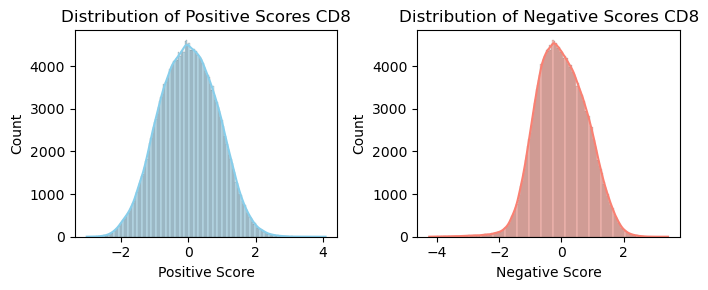

In [4]:
plt.figure(figsize=(7,3))

plt.subplot(1,2,1)
sns.histplot(cd8_called['pos_score_CD8'], kde=True, color='skyblue')
plt.title('Distribution of Positive Scores CD8')
plt.xlabel('Positive Score')

plt.subplot(1, 2, 2)
sns.histplot(cd8_called['neg_score_CD8'], kde=True, color='salmon')
plt.title('Distribution of Negative Scores CD8')
plt.xlabel('Negative Score')

plt.tight_layout()
plt.show()

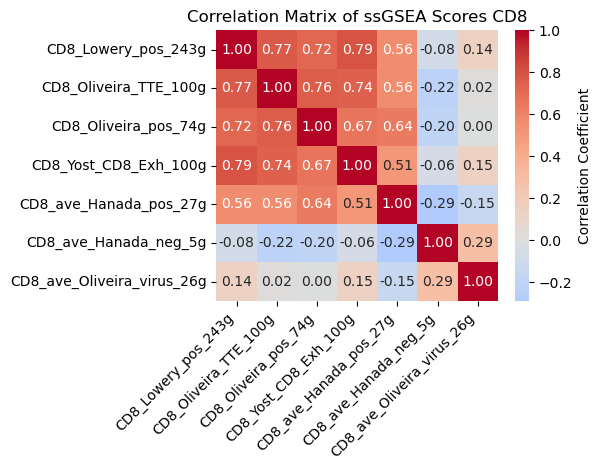

In [5]:
all_sigs_CD8 = pos_sigs_CD8+neg_sigs_CD8

corr_matrix = cd8_called[all_sigs_CD8].corr()

plt.figure(figsize=(6,4.8))
heatmap = sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0, fmt=".2f", 
                      cbar_kws={"label": "Correlation Coefficient"})


plt.title("Correlation Matrix of ssGSEA Scores CD8")
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [6]:
import pickle
with open("signatures_CD8.pkl", "rb") as f:
    sigs_CD8 = pickle.load(f)

print({k: len(v) for k, v in sigs_CD8.items()})

del sigs_CD8['Lowery_neg_99g']

{'Lowery_pos_243g': 243, 'Oliveira_TTE_100g': 100, 'Oliveira_pos_74g': 74, 'Yost_CD8_Exh_100g': 100, 'Hanada_pos_27g': 27, 'Lowery_neg_99g': 99, 'Oliveira_virus_26g': 26, 'Hanada_neg_5g': 5}


In [7]:
import scanpy as sc
from scipy.io import mmread
import os
data_folder = "data_from_RDS"

with open(os.path.join(data_folder,"rna_counts.mtx"), "r") as f:
    for _ in range(10):
        print(f.readline().strip())
rna_matrix = mmread(os.path.join(data_folder,"rna_counts.mtx")).T.tocsr()  # Transpose to cells × genes

# Read gene and cell names
genes = pd.read_csv(os.path.join(data_folder,"genes_rna.txt"), header=None)[0].tolist()
cells = pd.read_csv(os.path.join(data_folder,"cells_rna.txt"), header=None)[0].tolist()

# create anndata object
adata = sc.AnnData(rna_matrix)
adata.var_names = genes
adata.obs_names = cells

sc.pp.normalize_total(adata, target_sum=target_rd)
sc.pp.log1p(adata)

%%MatrixMarket matrix coordinate integer general
36601 273508 410820544
22 1 1
49 1 2
71 1 1
131 1 1
133 1 10
157 1 2
163 1 1
244 1 1


In [8]:
all_genes_flat_CD8 = [item for sublist in sigs_CD8.values() for item in sublist]
subset_genes_CD8 = list(set(all_genes_flat_CD8))

In [9]:
matched_genes_CD8 = []
matched_genes_CD4 = []

for s1 in subset_genes_CD8:
    if s1 in list(adata.var.index):
        matched_genes_CD8.append(s1)  
# Print match info
print(f" {len(matched_genes_CD8)}/{len(subset_genes_CD8)} CD8 genes are found.")

 394/396 CD8 genes are found.


c:\Users\linde\anaconda3\envs\sc_env\lib\functools.py:889: UserWarning: zero-centering a sparse array/matrix densifies it.
  return dispatch(args[0].__class__)(*args, **kw)
c:\Users\linde\anaconda3\envs\sc_env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\linde\AppData\Local\Temp\ipykernel_3352\1051438156.py:6: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(sub_adata, resolution=0.5)


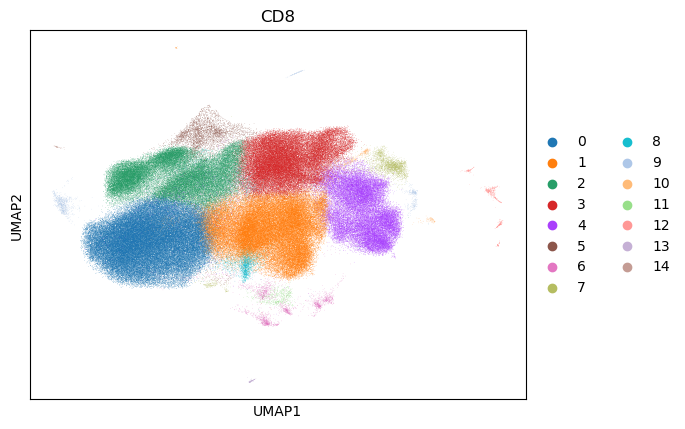

In [10]:
def run_cluster(sub_adata, key: str):
    sc.pp.scale(sub_adata)
    sc.tl.pca(sub_adata, svd_solver="arpack")
    sc.pp.neighbors(sub_adata, n_neighbors=10, n_pcs=40)
    sc.tl.umap(sub_adata)
    sc.tl.leiden(sub_adata, resolution=0.5)
    sc.pl.umap(sub_adata, color="leiden", title=key)
    return sub_adata.obs["leiden"].rename(f"cluster_{key}")

leiden_cd8 = run_cluster(adata[:, matched_genes_CD8].copy(), "CD8")



In [11]:
merged_df=pd.concat([cd8_called, leiden_cd8], axis=1)
merged_df

,CD8_Lowery_pos_243g,CD8_Oliveira_TTE_100g,CD8_Oliveira_pos_74g,CD8_Yost_CD8_Exh_100g,CD8_ave_Hanada_pos_27g,CD8_ave_Hanada_neg_5g,CD8_ave_Oliveira_virus_26g,pos_score_CD8,neg_score_CD8,cancer_reactive_per_cell_CD8,cluster_CD8
AAACCTGAGAAACGAG-1_13_1,-0.098436,-0.351365,-0.566494,-0.061993,0.153536,2.021764,0.182973,-1.204664,-0.021641,False,3
AAACCTGAGAAACGCC-1_16_1,-0.017802,-0.343835,-0.501123,-0.241483,0.071860,2.549293,0.323893,-1.418184,1.813170,False,3
AAACCTGAGAAGATTC-1_13_1,-0.238312,-0.299291,-0.530044,-0.238629,0.218767,2.490457,0.227181,-1.456563,1.033232,False,3
AAACCTGAGAAGGGTA-1_8_2,0.223560,-0.099895,-0.223325,-0.083291,0.323954,1.710888,0.222520,0.680210,-0.232141,True,4
AAACCTGAGAATTGTG-1_7_2,0.165879,-0.197214,-0.246176,0.007111,0.316033,2.073315,0.181891,0.502403,0.052160,False,4
...,...,...,...,...,...,...,...,...,...,...,...
restaging-30-518937639_fastq_v1_2021-04-27-1-8_hash9_TTGGCAAGTCTTCAAG-1,-0.106136,-0.313582,-0.463990,-0.219629,0.131538,1.961870,0.070212,-1.279999,-0.917248,False,3
restaging-30-518937639_fastq_v1_2021-04-27-1-8_hash9_TTTATGCAGCGTTGCC-1,-0.070015,-0.248626,-0.324710,-0.285509,0.345954,2.364253,0.130767,-0.592044,0.148919,False,2
restaging-30-518937639_fastq_v1_2021-04-27-1-8_hash9_TTTCCTCTCTGCTGCT-1,0.065543,-0.162404,-0.286431,-0.050731,0.368565,2.176138,0.202307,0.332585,0.359706,False,2
restaging-30-518937639_fastq_v1_2021-04-27-1-8_hash9_TTTGGTTAGACTCGGA-1,-0.162527,-0.286164,-0.467117,-0.089203,0.196583,2.386571,0.266894,-0.963182,1.151095,False,3


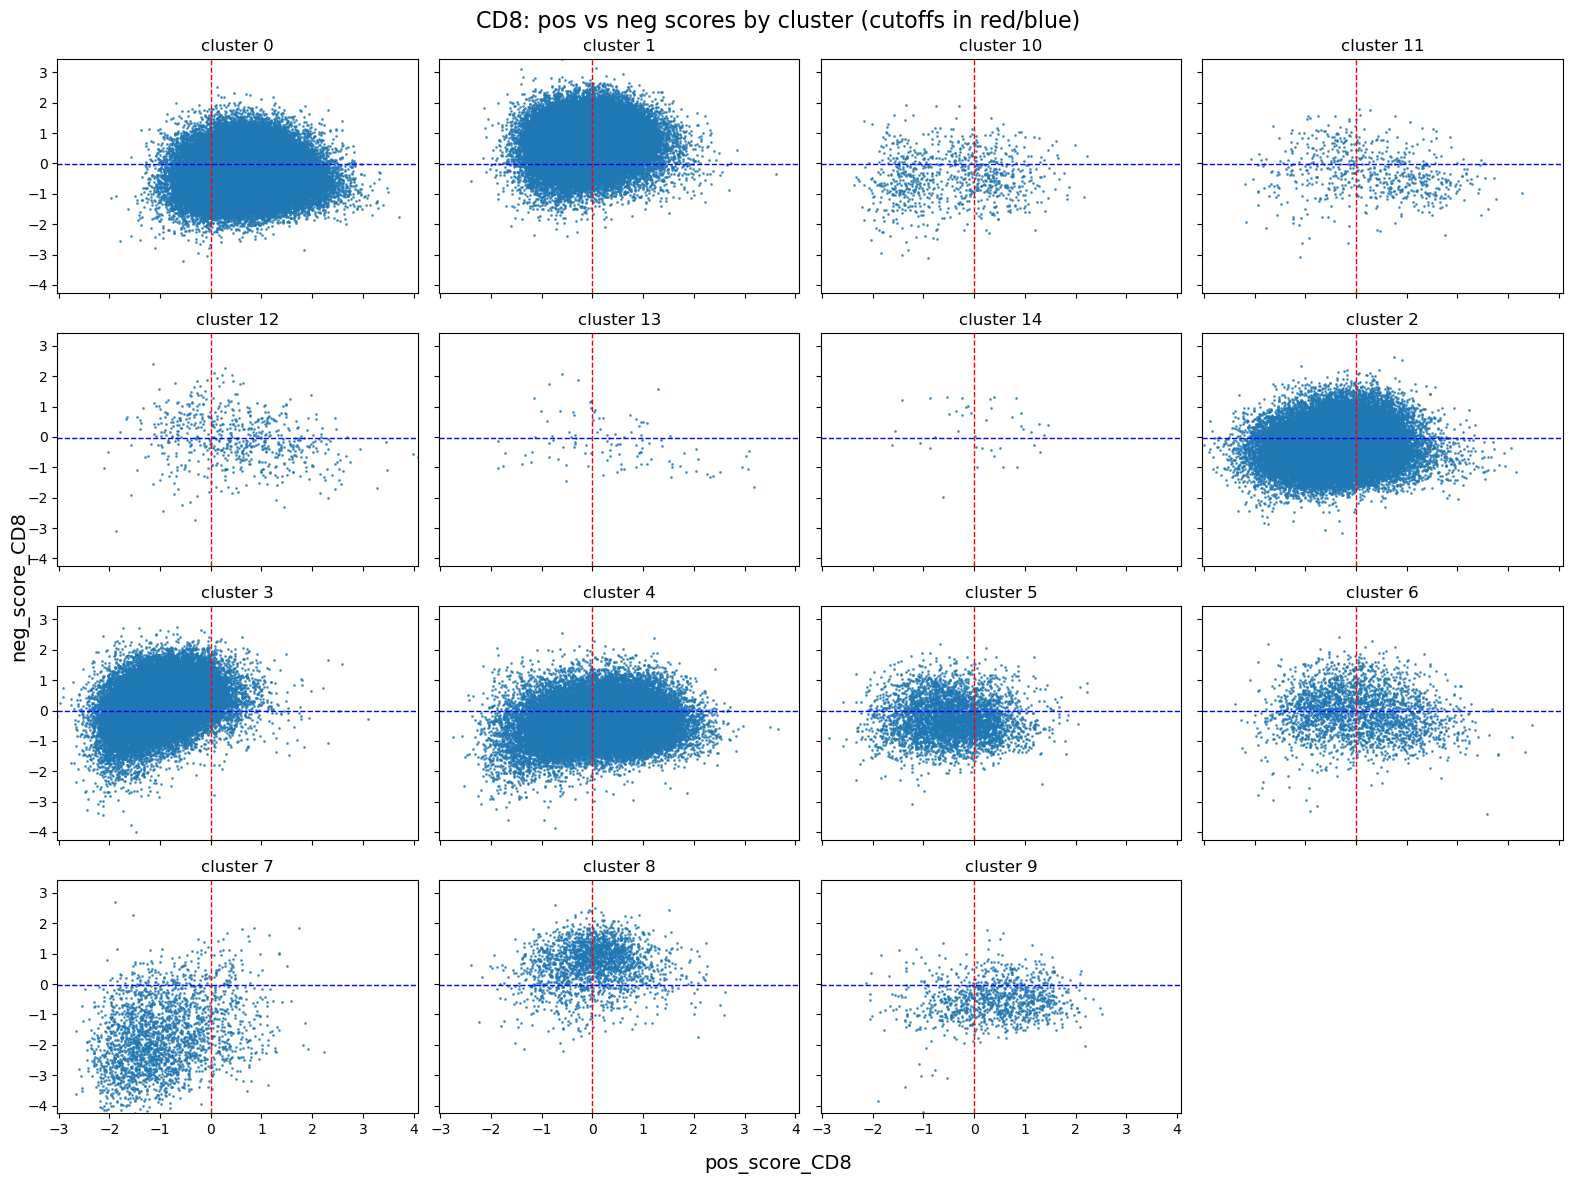

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

clusters = [c for c in merged_df['cluster_CD8'].unique() if pd.notna(c)]
clusters = sorted(clusters)

leiden_cd8

# global axis limits
xmin, xmax = merged_df['pos_score_CD8'].min(), merged_df['pos_score_CD8'].max()
ymin, ymax = merged_df['neg_score_CD8'].min(), merged_df['neg_score_CD8'].max()

# layout
n = len(clusters)
ncols = 4
nrows = int(np.ceil(n / ncols))

fig, axes = plt.subplots(
    nrows, ncols,
    figsize=(4*ncols, 3*nrows),
    sharex=True, sharey=True
)

for ax, clu in zip(axes.flat, clusters):
    sub = merged_df[merged_df['cluster_CD8'] == clu]
    
    # scatter
    ax.scatter(
        sub['pos_score_CD8'],
        sub['neg_score_CD8'],
        s=1,
        alpha=0.7
    )
    

    ax.axvline(pos_cut_CD8, color='red', linestyle='--', linewidth=1)
    ax.axhline(neg_cut_CD8, color='blue', linestyle='--', linewidth=1)
    
    ax.set_title(f'cluster {int(clu)}')
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)

# turn off any unused subplots
for ax in axes.flat[n:]:
    ax.axis('off')

# global labels & title
fig.supxlabel('pos_score_CD8', fontsize=14)
fig.supylabel('neg_score_CD8', fontsize=14)
fig.suptitle('CD8: pos vs neg scores by cluster (cutoffs in red/blue)', fontsize=16)

plt.tight_layout()
plt.show()

In [13]:
# Group by cluster and compute the fraction reactive
cluster_frac = (
    merged_df
    .groupby("cluster_CD8")["cancer_reactive_per_cell_CD8"]
    .mean()
    .rename("reactive_fraction")
)

cluster_frac_df = cluster_frac.reset_index()
cluster_frac_df

C:\Users\linde\AppData\Local\Temp\ipykernel_3352\2747455022.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby("cluster_CD8")["cancer_reactive_per_cell_CD8"]


,cluster_CD8,reactive_fraction
0,0,0.626945
1,1,0.037762
2,2,0.180889
3,3,0.008693
4,4,0.44686
5,5,0.198036
6,6,0.278097
7,7,0.109617
8,8,0.066909
9,9,0.554117


In [14]:
threshold = 0.4
reactive_pairs = set(
    cluster_frac[cluster_frac > threshold].index
)

reactive_pairs

{'0', '11', '12', '13', '4', '9'}

In [15]:
# map back to every cell
merged_df["cancer_reactive_by_cluster"] = merged_df.apply(
    lambda r: True
              if r["cluster_CD8"] in reactive_pairs
              else False,
    axis=1
)
merged_df

,CD8_Lowery_pos_243g,CD8_Oliveira_TTE_100g,CD8_Oliveira_pos_74g,CD8_Yost_CD8_Exh_100g,CD8_ave_Hanada_pos_27g,CD8_ave_Hanada_neg_5g,CD8_ave_Oliveira_virus_26g,pos_score_CD8,neg_score_CD8,cancer_reactive_per_cell_CD8,cluster_CD8,cancer_reactive_by_cluster
AAACCTGAGAAACGAG-1_13_1,-0.098436,-0.351365,-0.566494,-0.061993,0.153536,2.021764,0.182973,-1.204664,-0.021641,False,3,False
AAACCTGAGAAACGCC-1_16_1,-0.017802,-0.343835,-0.501123,-0.241483,0.071860,2.549293,0.323893,-1.418184,1.813170,False,3,False
AAACCTGAGAAGATTC-1_13_1,-0.238312,-0.299291,-0.530044,-0.238629,0.218767,2.490457,0.227181,-1.456563,1.033232,False,3,False
AAACCTGAGAAGGGTA-1_8_2,0.223560,-0.099895,-0.223325,-0.083291,0.323954,1.710888,0.222520,0.680210,-0.232141,True,4,True
AAACCTGAGAATTGTG-1_7_2,0.165879,-0.197214,-0.246176,0.007111,0.316033,2.073315,0.181891,0.502403,0.052160,False,4,True
...,...,...,...,...,...,...,...,...,...,...,...,...
restaging-30-518937639_fastq_v1_2021-04-27-1-8_hash9_TTGGCAAGTCTTCAAG-1,-0.106136,-0.313582,-0.463990,-0.219629,0.131538,1.961870,0.070212,-1.279999,-0.917248,False,3,False
restaging-30-518937639_fastq_v1_2021-04-27-1-8_hash9_TTTATGCAGCGTTGCC-1,-0.070015,-0.248626,-0.324710,-0.285509,0.345954,2.364253,0.130767,-0.592044,0.148919,False,2,False
restaging-30-518937639_fastq_v1_2021-04-27-1-8_hash9_TTTCCTCTCTGCTGCT-1,0.065543,-0.162404,-0.286431,-0.050731,0.368565,2.176138,0.202307,0.332585,0.359706,False,2,False
restaging-30-518937639_fastq_v1_2021-04-27-1-8_hash9_TTTGGTTAGACTCGGA-1,-0.162527,-0.286164,-0.467117,-0.089203,0.196583,2.386571,0.266894,-0.963182,1.151095,False,3,False


In [16]:
# map back to every cell
merged_df["cancer_reactive"] = merged_df.apply(
    lambda r: True
              if r["cancer_reactive_per_cell_CD8"] and r["cancer_reactive_by_cluster"]
              else False,
    axis=1
)
merged_df

,CD8_Lowery_pos_243g,CD8_Oliveira_TTE_100g,CD8_Oliveira_pos_74g,CD8_Yost_CD8_Exh_100g,CD8_ave_Hanada_pos_27g,CD8_ave_Hanada_neg_5g,CD8_ave_Oliveira_virus_26g,pos_score_CD8,neg_score_CD8,cancer_reactive_per_cell_CD8,cluster_CD8,cancer_reactive_by_cluster,cancer_reactive
AAACCTGAGAAACGAG-1_13_1,-0.098436,-0.351365,-0.566494,-0.061993,0.153536,2.021764,0.182973,-1.204664,-0.021641,False,3,False,False
AAACCTGAGAAACGCC-1_16_1,-0.017802,-0.343835,-0.501123,-0.241483,0.071860,2.549293,0.323893,-1.418184,1.813170,False,3,False,False
AAACCTGAGAAGATTC-1_13_1,-0.238312,-0.299291,-0.530044,-0.238629,0.218767,2.490457,0.227181,-1.456563,1.033232,False,3,False,False
AAACCTGAGAAGGGTA-1_8_2,0.223560,-0.099895,-0.223325,-0.083291,0.323954,1.710888,0.222520,0.680210,-0.232141,True,4,True,True
AAACCTGAGAATTGTG-1_7_2,0.165879,-0.197214,-0.246176,0.007111,0.316033,2.073315,0.181891,0.502403,0.052160,False,4,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
restaging-30-518937639_fastq_v1_2021-04-27-1-8_hash9_TTGGCAAGTCTTCAAG-1,-0.106136,-0.313582,-0.463990,-0.219629,0.131538,1.961870,0.070212,-1.279999,-0.917248,False,3,False,False
restaging-30-518937639_fastq_v1_2021-04-27-1-8_hash9_TTTATGCAGCGTTGCC-1,-0.070015,-0.248626,-0.324710,-0.285509,0.345954,2.364253,0.130767,-0.592044,0.148919,False,2,False,False
restaging-30-518937639_fastq_v1_2021-04-27-1-8_hash9_TTTCCTCTCTGCTGCT-1,0.065543,-0.162404,-0.286431,-0.050731,0.368565,2.176138,0.202307,0.332585,0.359706,False,2,False,False
restaging-30-518937639_fastq_v1_2021-04-27-1-8_hash9_TTTGGTTAGACTCGGA-1,-0.162527,-0.286164,-0.467117,-0.089203,0.196583,2.386571,0.266894,-0.963182,1.151095,False,3,False,False


In [18]:
merged_df.to_csv("processed_data.csv", index=True)